## Research Question
### Is there a relationship between the life ladder and GDP per capita from 2008 to 2018? If there is a relationship between the life ladder and GDP per capita, which year has the most positive/negative relationship?

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from pandas_profiling import ProfileReport

sys.path.append('..')

## Import functions and load data

In [2]:
from scripts import project_functions as pt
df = pt.load_and_process('whreport.csv')
df

,Country name,year,Life Ladder,Log GDP per capita,GDP per capita
0,Afghanistan,2008,3.724,7.370,1587.633783
1,Afghanistan,2009,4.402,7.540,1881.830025
2,Afghanistan,2010,4.758,7.647,2094.353096
3,Afghanistan,2011,3.832,7.620,2038.562130
4,Afghanistan,2012,3.783,7.705,2219.417382
...,...,...,...,...,...
1327,Zimbabwe,2014,4.184,7.991,2954.249733
1328,Zimbabwe,2015,3.703,7.992,2957.205460
1329,Zimbabwe,2016,3.735,7.984,2933.642195
1330,Zimbabwe,2017,3.638,8.016,3029.036921


## Basic EDA

In [3]:
df.shape

(1332, 5)

In [4]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,GDP per capita
0,Afghanistan,2008,3.724,7.370,1587.633783
1,Afghanistan,2009,4.402,7.540,1881.830025
2,Afghanistan,2010,4.758,7.647,2094.353096
3,Afghanistan,2011,3.832,7.620,2038.562130
4,Afghanistan,2012,3.783,7.705,2219.417382


In [5]:
df.nunique(axis=0)

Country name           154
year                    11
Life Ladder           1126
Log GDP per capita    1121
GDP per capita        1121
dtype: int64

In [6]:
df.describe()

,year,Life Ladder,Log GDP per capita,GDP per capita
count,1332.000000,1332.000000,1332.000000,1332.000000
mean,2013.195946,5.426606,9.311146,19422.905537
std,3.105926,1.148279,1.164099,19373.491919
min,2008.000000,2.662000,6.635000,761.279066
25%,2011.000000,4.550000,8.358500,4266.292128
50%,2013.000000,5.320000,9.445500,12651.121230
75%,2016.000000,6.269750,10.260250,28573.931461
max,2018.000000,7.971000,11.645000,114119.337498


### create a list of country name

In [7]:
countrylist = list(set(df['Country name']))

## Scatterplot for life ladder and GDP per capita to see the relationship between this two variables

<AxesSubplot:xlabel='Life Ladder', ylabel='GDP per capita'>

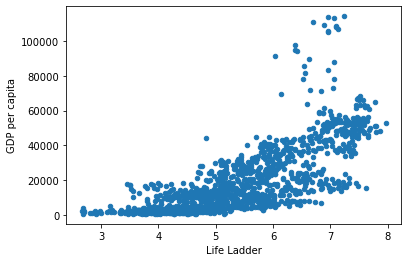

In [8]:
df.plot(kind='scatter', x='Life Ladder', y='GDP per capita') #relationship between life ladder and gdp per capita (in value)

## Scatterplot for life ladder and Log GDP per capita to see the relationship between this two variables
- compared to the plot above, the relationship between life ladder and log GDP per capita is clearer than using GDP per capita 

<AxesSubplot:xlabel='Life Ladder', ylabel='Log GDP per capita'>

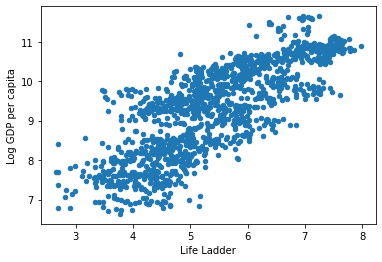

In [9]:
df.plot(kind='scatter', x='Life Ladder', y='Log GDP per capita') #relationship between life ladder and log gdp per capita

## Creata a profile report for EDA

In [13]:
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## using df.describe() output to create low, medium, high gdp range

In [10]:
lowgdp = df[(df['Log GDP per capita'] >= 6.635) & (df['Log GDP per capita'] <= 8.3585)]

In [11]:
mediumgdp = df[(df['Log GDP per capita'] >= 6.3585) & (df['Log GDP per capita'] <= 10.26025)]

In [12]:
highgdp = df[(df['Log GDP per capita'] >= 10.26025) & (df['Log GDP per capita'] <= 11.645)]

## Create a jointplot for visualization

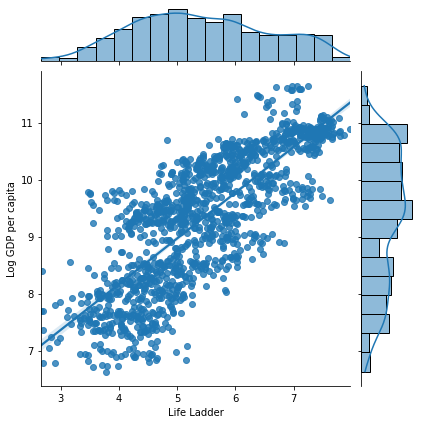

In [14]:
sns.jointplot(x='Life Ladder', y='Log GDP per capita', data=df, kind='reg')

## Pairplot for visualization

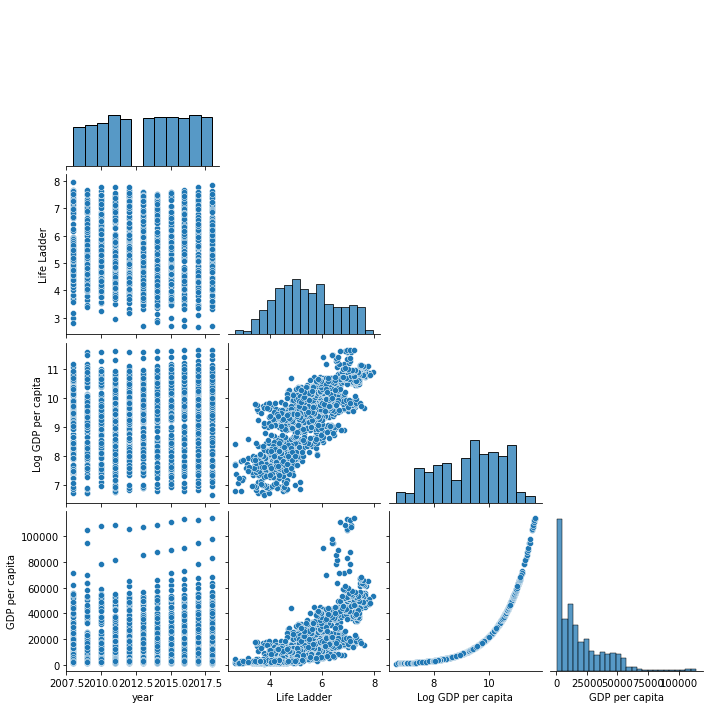

In [16]:
sns.pairplot(df, corner =True)

## use load_year function to load the year and creata 2008 joint plot

In [ ]:
df2008=pt.load_year(df,2008)

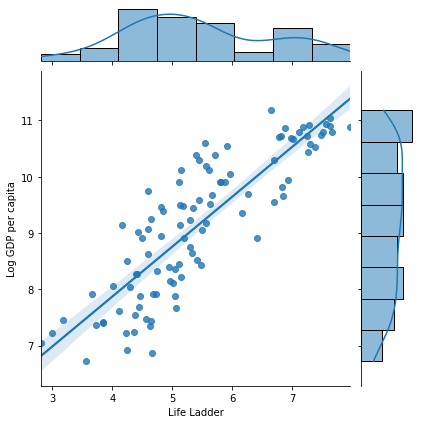

In [17]:
sns.jointplot(x='Life Ladder', y='Log GDP per capita', data=df2008, kind='reg')

## 2009 Jointplot for visualization 

In [5]:
df2009=pt.load_year(df,2009)

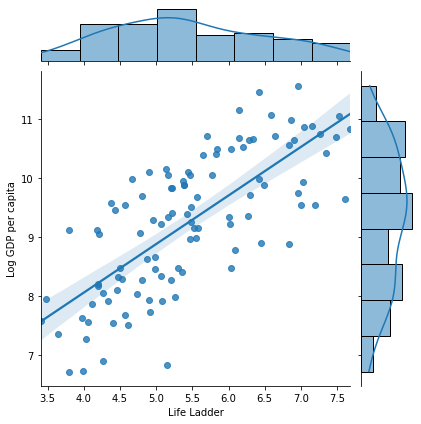

In [18]:
sns.jointplot(x='Life Ladder', y='Log GDP per capita', data=df2009, kind='reg')

In [27]:
sns.set_theme(style="ticks",
              font_scale=1.3,)

## Creata a facetgrid of regression plots for all years for comparing and visualization

<Figure size 720x864 with 0 Axes>

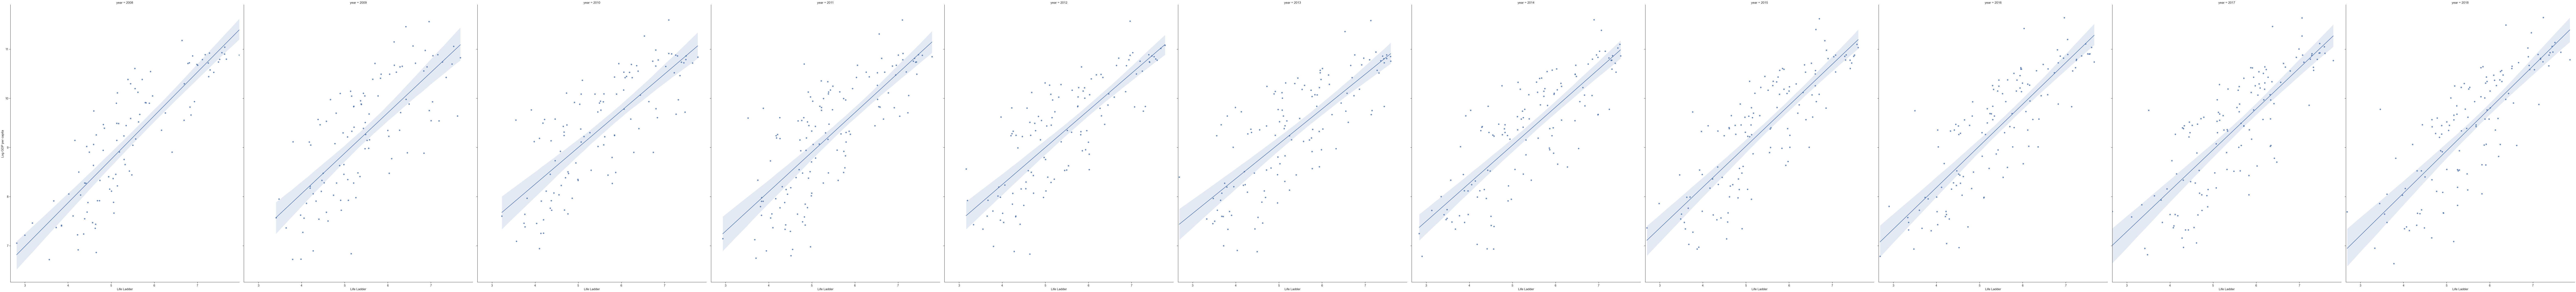

In [29]:
plt.figure(figsize=(10,12))
sns.lmplot(x='Life Ladder', y='Log GDP per capita', data=df, col='year', height=20, aspect=0.8)

## Trying to use another pairgrid to see which plot is better

<Figure size 2880x2160 with 0 Axes>

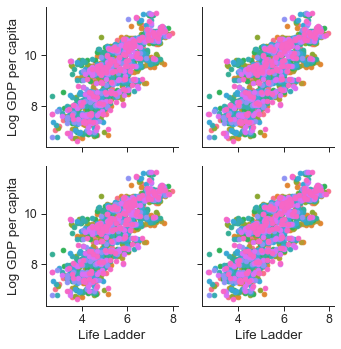

In [34]:
plt.figure(figsize=(40,30))
sns.set_context('paper', font_scale=1.4)
year_g = sns.PairGrid(df, hue="year",
                      x_vars=["Life Ladder", "Life Ladder"],
                      y_vars=["Log GDP per capita", "Log GDP per capita"])

year_g.map(plt.scatter)

## Export data

In [16]:
df.to_csv('eloise_data.csv', index = False, header=True)